<a href="https://colab.research.google.com/github/alaaosama72/Implement-the-numerical-example-from-scratch-LSTM-/blob/main/Implement_the_numerical_example_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

In [3]:

W_f, U_f, b_f = 0.5, 0.1, 0
W_i, U_i, b_i = 0.6, 0.2, 0
W_c, U_c, b_c = 0.7, 0.3, 0
W_o, U_o, b_o = 0.8, 0.4, 0

In [4]:
# Initial hidden state and cell state
h_prev = 0.0
C_prev = 0.0

In [5]:
X = [1, 2, 3]

In [6]:
# Parameters for the final output prediction
W_y, b_y = 3, 0

In [7]:
# Lists to store hidden states and cell states for each time step
hs = []
Cs = []

In [8]:
# Lists to store gate values for visualization
forget_gate_values = []
input_gate_values = []
candidate_values = []
output_gate_values = []

In [9]:
for t, x in enumerate(X, start=1):
    # Calculate (forget gate)
    f_t = sigmoid(W_f * x + U_f * h_prev + b_f)

    # Calculate (input gate)
    i_t = sigmoid(W_i * x + U_i * h_prev + b_i)

    # Calculate (candidate cell state)
    C_t_candidate = tanh(W_c * x + U_c * h_prev + b_c)

    # (Update cell state)
    C_t = f_t * C_prev + i_t * C_t_candidate

    # (Calculate output gate)
    o_t = sigmoid(W_o * x + U_o * h_prev + b_o)

    # Store gate values
    forget_gate_values.append(f_t)
    input_gate_values.append(i_t)
    candidate_values.append(C_t_candidate)
    output_gate_values.append(o_t)

    # (Update hidden state)
    h_t = o_t * tanh(C_t)

    # Save the results
    hs.append(h_t)
    Cs.append(C_t)

    # Prepare for next time step
    h_prev, C_prev = h_t, C_t

    # Print the computations for the --current time step--
    print(f"Time Step {t}, Input = {x}")
    print(f"  f_t = {f_t:.3f}, i_t = {i_t:.3f}, C_t_candidate = {C_t_candidate:.3f}")
    print(f"  C_t = {C_t:.3f}, o_t = {o_t:.3f}, h_t = {h_t:.3f}\n")


Time Step 1, Input = 1
  f_t = 0.622, i_t = 0.646, C_t_candidate = 0.604
  C_t = 0.390, o_t = 0.690, h_t = 0.256

Time Step 2, Input = 2
  f_t = 0.736, i_t = 0.778, C_t_candidate = 0.901
  C_t = 0.988, o_t = 0.846, h_t = 0.640

Time Step 3, Input = 3
  f_t = 0.827, i_t = 0.873, C_t_candidate = 0.980
  C_t = 1.672, o_t = 0.934, h_t = 0.871



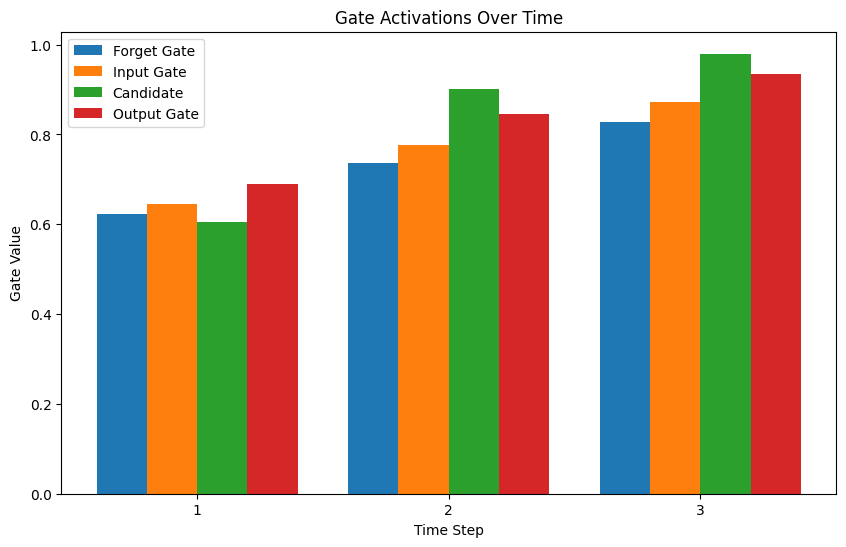

In [10]:
# Bar chart of gate values
import matplotlib.pyplot as plt

time_steps = range(1, len(X)+1)
plt.figure(figsize=(10, 6))
width = 0.2

plt.bar([p - 1.5*width for p in time_steps], forget_gate_values, width=width, label='Forget Gate')
plt.bar([p - 0.5*width for p in time_steps], input_gate_values, width=width, label='Input Gate')
plt.bar([p + 0.5*width for p in time_steps], candidate_values, width=width, label='Candidate')
plt.bar([p + 1.5*width for p in time_steps], output_gate_values, width=width, label='Output Gate')

plt.xlabel("Time Step")
plt.ylabel("Gate Value")
plt.title("Gate Activations Over Time")
plt.xticks(time_steps)

plt.legend()
plt.show()

In [11]:
# Predict the next value using the last hidden state
h_T = hs[-1]
y_pred = W_y * h_T + b_y

print(f"Predicted next value: {y_pred:.3f}")

Predicted next value: 2.612


As you can see, the answer is `2.985`, so why doesn't the model produce a prediction of 40 🤔🤔?

    Because the weights and values used in the example were chosen randomly for illustration purposes, and there is no learning or training mechanism to adjust them to fit the sequence of [10, 20, 30] to produce 40. Therefore, the calculations are not consistent with the predictions of the real sequence. It is a very simple application to understand the structure of the (LSTM).
    
    you can complete the codes until you reach a code that adjusts the parameters until it reaches the result.

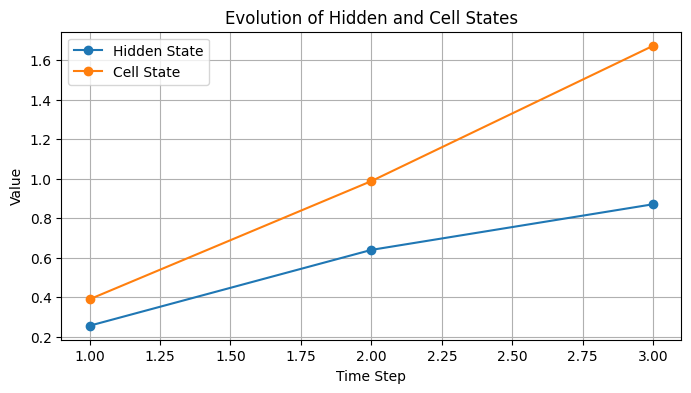

In [12]:
import matplotlib.pyplot as plt

# Assume hs and Cs store the hidden and cell states for each time step
time_steps = range(1, len(hs) + 1)

plt.figure(figsize=(8, 4))
plt.plot(time_steps, hs, marker='o', label='Hidden State')
plt.plot(time_steps, Cs, marker='o', label='Cell State')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Evolution of Hidden and Cell States')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

In [14]:
# Create stopwords set for WordCloud
stopwords = set(STOPWORDS)

In [15]:
# text example from "A Tale of Two Cities" by Charles Dickens 😎

data = """
It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair.
"""

In [16]:
# Generate a WordCloud from the input text
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    random_state=42
).generate(data)

In [17]:
# Remove newline characters
data = data.replace("\n", " ")

# Convert text to lowercase
data = data.lower()

# Remove punctuation
data = data.translate(str.maketrans('', '', string.punctuation))

# Optionally remove the first and last character (if needed)
data = data[1:-1]

print(f"Processed Data:\n{data}")

Processed Data:
it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair


In [18]:
# Create character dictionaries
chars = sorted(set(data))
char_to_idx = {c: i for (i, c) in enumerate(chars)}
idx_to_char = {i: c for (i, c) in enumerate(chars)}

----
## - Parameters and Activation Functions
----

In [19]:
data_size, char_size = len(data), len(chars)

hidden_size = 10  # Size of hidden layer
weight_sd = 0.1   # Standard deviation for weight initialization
z_size = hidden_size + char_size  # Combined size of previous hidden state and current input
t_steps = 25  # Time steps for training

In [20]:
# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    return y * (1 - y)



def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1 - y * y

In [ ]:
def forward(x, u, q):
    z = np.row_stack((q, x))
    a = sigmoid(np.dot(wa, z) + ba)
    b = sigmoid(np.dot(wb, z) + bb)
    c = tanh(np.dot(wc, z) + bc)
    d = sigmoid(np.dot(wd, z) + bd)
    e = a * u + b * c
    h = d * tanh(e)
    v = np.dot(wv, h) + bv
    y = np.exp(v) / np.sum(np.exp(v))
    return z, a, b, c, d, e, h, v, y

Update model parameters using `SGD`:

    Inputs:
      - grads: gradients for each parameter
      - theta: current parameters (weights and biases)
      - lr: learning rate
    Returns:
      - Updated parameters

In [ ]:
def optimize(grads, theta, lr=0.05):
    dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv = grads
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = theta
    wa -= dwa * lr
    wb -= dwb * lr
    wc -= dwc * lr
    wd -= dwd * lr
    wv -= dwv * lr
    ba -= dba * lr
    bb -= dbb * lr
    bc -= dbc * lr
    bd -= dbd * lr
    bv -= dbv * lr
    return wa, wb, wc, wd, wv, ba, bb, bc, bd, bv

----
## - Initialize Variables and Model Parameters
----

In [ ]:
losses = {}
z, a, b, c, d, e, h, v, y = {}, {}, {}, {}, {}, {}, {}, {}, {}
q, x, u = {}, {}, {}

In [ ]:
# Initialize weights for LSTM gates (wa, wb, wc, wd)
wa, wb, wc, wd = [np.random.randn(hidden_size, z_size) * weight_sd + 0.5 for _ in range(4)]
ba, bb, bc, bd = [np.zeros((hidden_size, 1)) for _ in range(4)]

In [ ]:
# Output layer parameters
wv = np.random.randn(char_size, hidden_size) * weight_sd
bv = np.zeros((char_size, 1))
q[-1] = np.zeros((hidden_size, 1))
u[-1] = np.zeros((hidden_size, 1))

In [ ]:
# Prepare training data (one-hot encoding indices)
pointer = 25
t_steps = 25
inputs = [char_to_idx[ch] for ch in data[pointer: pointer + t_steps]]
targets = [char_to_idx[ch] for ch in data[pointer + 1: pointer + t_steps + 1]]

---
## - Training Loop
---

In [ ]:
for epoch in range(1000):
    loss = 0

    # Forward propagation for each time step
    for t in range(len(inputs)):
        # Create one-hot encoded vector for input character
        x[t] = np.zeros((char_size, 1))
        x[t][inputs[t]] = 1

        # Forward pass through the LSTM cell
        z[t], a[t], b[t], c[t], d[t], e[t], h[t], v[t], y[t] = forward(x[t], u[t - 1], q[t - 1])
        u[t], q[t] = e[t], h[t]

        loss += -np.log(y[t][targets[t], 0])

    # Initialize gradients for backpropagation
    dh_next = np.zeros_like(q[0])
    de_next = np.zeros_like(u[0])
    dwa, dwb, dwc, dwd, dwv = 0, 0, 0, 0, 0
    dba, dbb, dbc, dbd, dbv = 0, 0, 0, 0, 0

    # Backward propagation through time (BPTT)
    for t in reversed(range(len(inputs))):
        target = targets[t]
        dv = np.copy(y[t])
        dv[target] -= 1

        dwv += np.dot(dv, h[t].T)
        dbv += dv

        dh = np.dot(wv.T, dv) + dh_next

        dd = dh * tanh(e[t])
        dd = dsigmoid(d[t]) * dd

        dwd += np.dot(dd, z[t].T)
        dbd += dd

        de = np.copy(de_next)
        de += dh * d[t] * dtanh(tanh(e[t]))

        dc = de * b[t]
        dc = dtanh(c[t]) * dc

        dwc += np.dot(dc, z[t].T)
        dbc += dc

        db_temp = de * dc
        db_temp = dsigmoid(b[t]) * db_temp
        dwb += np.dot(db_temp, z[t].T)
        dbb += db_temp

        da = de * u[t - 1]
        da = dsigmoid(a[t]) * da
        dwa += np.dot(da, z[t].T)
        dba += da

        dz = (np.dot(wa.T, da)
              + np.dot(wb.T, db_temp)
              + np.dot(wc.T, dc)
              + np.dot(dd.T, dd))
        dh_next = dz[:hidden_size, :]
        de_next = a[t] * de

    grads = (dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv)
    theta = (wa, wb, wc, wd, wv, ba, bb, bc, bd, bv)

    # Update parameters using SGD
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = optimize(grads, theta)

    losses[epoch] = loss

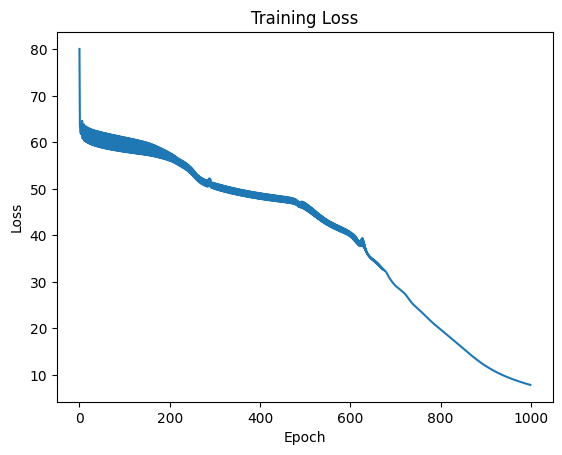

In [ ]:
# Plot training loss over epochs
plt.plot(list(losses.keys()), list(losses.values()))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()